# Experiment 02: Attention U-Net

This notebook tests our first major architectural upgrade from the "RAovSeg" paper. We are replacing the standard U-Net with an Attention U-Net to see if the attention mechanism can improve performance by helping the model focus on relevant features and suppress noise.

### **Model Configuration**

*   **Objective**: Evaluate the performance of an **Attention U-Net** on Ovary Segmentation.
*   **Model Architecture**: **Attention U-Net (from `src/models.py`)**.
*   **Dataset**: D2_TCPW, filtered for patients with both a T2FS MRI and an ovary mask (`d2_manifest_t2fs_ovary_eligible.csv`).
*   **Input Data**: T2-weighted fat suppression (`_T2FS.nii.gz`) MRI scans.
*   **Target Data**: Ovary masks (`_ov.nii.gz`).
*   **Preprocessing**: Min-max normalization to [0, 1].
*   **Data Augmentation**: Simple `RandomAffine` (rotation, translation) and `RandomHorizontalFlip`.
*   **Loss Function**: `DiceBCELoss` (50% Dice, 50% BCE).
*   **Optimizer**: Adam.
*   **Learning Rate**: 1e-4 (constant).
*   **Epochs**: 20.
*   **Batch Size**: 1.
*   **Image Size**: 256x256.
*   **Data Split**: 80% train / 20% validation, split by patient ID.

--- Loading Ovary Data ---
Loading manifest from ../data/d2_manifest_t2fs_ovary_eligible.csv and creating slice map...
Slice map created. Found 278 slices containing the uterus.
Loading manifest from ../data/d2_manifest_t2fs_ovary_eligible.csv and creating slice map...
Slice map created. Found 278 slices containing the uterus.
Data successfully split:
Training patients: 44, Validation patients: 12
Training slices: 214
Validation slices: 64

Using device: cuda

--- Starting Attention U-Net Model Training ---


Validation: 100%|██████████| 64/64 [00:14<00:00,  4.54it/s]


Epoch 1/20 -> Train Loss: 0.6692, Val Loss: 0.6082, Val Dice: 0.3145
  -> New best model saved at epoch 1 with Val Dice: 0.3145


Validation: 100%|██████████| 64/64 [00:10<00:00,  6.16it/s]


Epoch 2/20 -> Train Loss: 0.5957, Val Loss: 0.5587, Val Dice: 0.3920
  -> New best model saved at epoch 2 with Val Dice: 0.3920


Validation: 100%|██████████| 64/64 [00:09<00:00,  6.82it/s]


Epoch 3/20 -> Train Loss: 0.5575, Val Loss: 0.5391, Val Dice: 0.0559


Validation: 100%|██████████| 64/64 [00:09<00:00,  6.52it/s]


Epoch 4/20 -> Train Loss: 0.5293, Val Loss: 0.5406, Val Dice: 0.0000


Validation: 100%|██████████| 64/64 [00:11<00:00,  5.62it/s]


Epoch 5/20 -> Train Loss: 0.5020, Val Loss: 0.5303, Val Dice: 0.0074


Validation: 100%|██████████| 64/64 [00:11<00:00,  5.72it/s]


Epoch 6/20 -> Train Loss: 0.4740, Val Loss: 0.4821, Val Dice: 0.2564


Validation: 100%|██████████| 64/64 [00:10<00:00,  6.07it/s]


Epoch 7/20 -> Train Loss: 0.4455, Val Loss: 0.5267, Val Dice: 0.0000


Validation: 100%|██████████| 64/64 [00:11<00:00,  5.61it/s]


Epoch 8/20 -> Train Loss: 0.4184, Val Loss: 0.4534, Val Dice: 0.2828


Validation: 100%|██████████| 64/64 [00:11<00:00,  5.77it/s]


Epoch 9/20 -> Train Loss: 0.3962, Val Loss: 0.4985, Val Dice: 0.2416


Validation: 100%|██████████| 64/64 [00:11<00:00,  5.80it/s]


Epoch 10/20 -> Train Loss: 0.3763, Val Loss: 0.4376, Val Dice: 0.2496


Validation: 100%|██████████| 64/64 [00:10<00:00,  6.01it/s]


Epoch 11/20 -> Train Loss: 0.3534, Val Loss: 0.4201, Val Dice: 0.3688


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.97it/s]


Epoch 12/20 -> Train Loss: 0.3432, Val Loss: 0.4104, Val Dice: 0.2985


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.91it/s]


Epoch 13/20 -> Train Loss: 0.3406, Val Loss: 0.5288, Val Dice: 0.0292


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.95it/s]


Epoch 14/20 -> Train Loss: 0.3209, Val Loss: 0.4712, Val Dice: 0.1553


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.94it/s]


Epoch 15/20 -> Train Loss: 0.3628, Val Loss: 0.4584, Val Dice: 0.1753


Validation: 100%|██████████| 64/64 [00:11<00:00,  5.78it/s]


Epoch 16/20 -> Train Loss: 0.3339, Val Loss: 0.3973, Val Dice: 0.3266


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.90it/s]


Epoch 17/20 -> Train Loss: 0.3070, Val Loss: 0.4093, Val Dice: 0.3177


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.88it/s]


Epoch 18/20 -> Train Loss: 0.2963, Val Loss: 0.4195, Val Dice: 0.3091


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.87it/s]


Epoch 19/20 -> Train Loss: 0.3049, Val Loss: 0.3931, Val Dice: 0.3329


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.89it/s]


Epoch 20/20 -> Train Loss: 0.2942, Val Loss: 0.4492, Val Dice: 0.2011
--- Finished Training ---
Best model was from epoch 2 with a validation Dice score of 0.3920
Model saved to ../models/09_attention_unet_best.pth



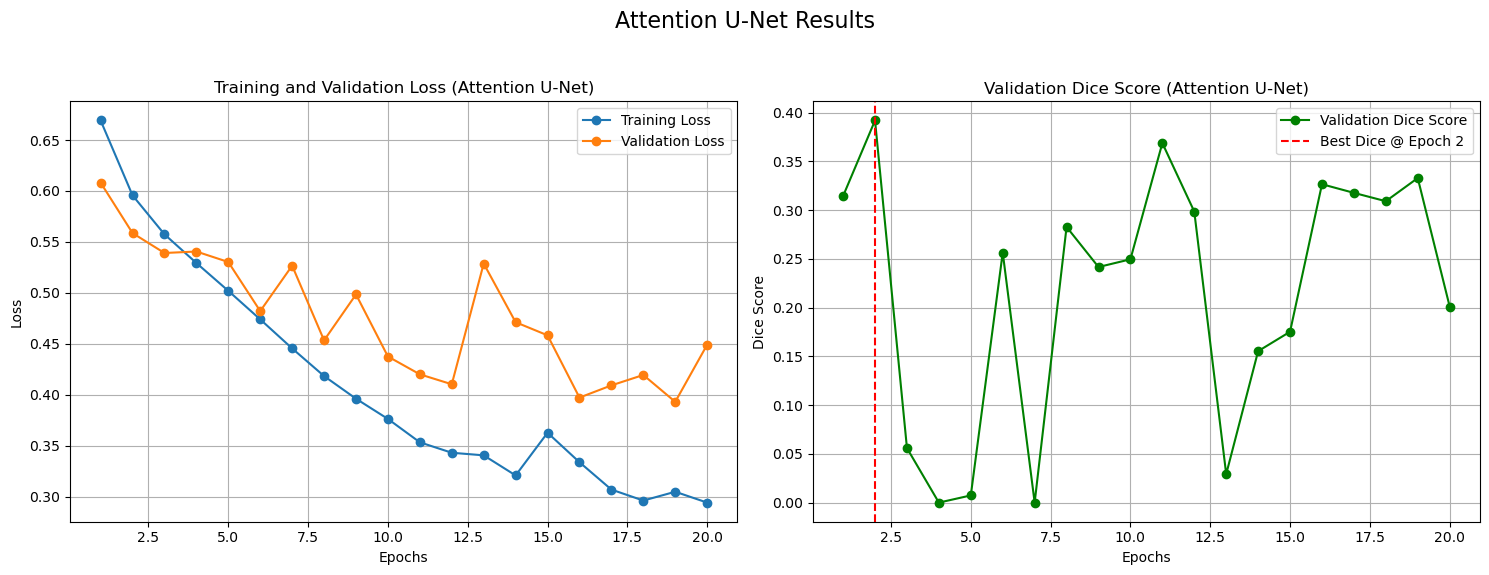

In [1]:
# --- Imports and Setup ---
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset
from torch.optim import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys

# Add project root to path to allow importing from src
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.append(project_root)

from src.data_loader import UterusDataset
from src.models import UNet, AttentionUNet # <--- CHANGE: Import AttentionUNet as well

# --- Configuration ---
manifest_path = '../data/d2_manifest_t2fs_ovary_eligible.csv' # Using the same clean manifest
image_size = 256
batch_size = 1
num_epochs = 20
lr = 1e-4

# --- Data Loading (Identical to baseline) ---
print("--- Loading Ovary Data ---")
train_full_dataset = UterusDataset(manifest_path=manifest_path, image_size=image_size, augment=True)
val_full_dataset = UterusDataset(manifest_path=manifest_path, image_size=image_size, augment=False)

patient_ids = train_full_dataset.manifest['patient_id'].unique()
split_idx = int(len(patient_ids) * 0.8)
train_ids, val_ids = patient_ids[:split_idx], patient_ids[split_idx:]

train_indices = [i for i, sm in enumerate(train_full_dataset.slice_map) if train_full_dataset.manifest.loc[sm['patient_index'], 'patient_id'] in train_ids]
val_indices = [i for i, sm in enumerate(val_full_dataset.slice_map) if val_full_dataset.manifest.loc[sm['patient_index'], 'patient_id'] in val_ids]

train_dataset = Subset(train_full_dataset, train_indices)
val_dataset = Subset(val_full_dataset, val_indices)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
print(f"Data successfully split:\nTraining patients: {len(train_ids)}, Validation patients: {len(val_ids)}\nTraining slices: {len(train_dataset)}\nValidation slices: {len(val_dataset)}")

# --- Metrics, Loss, and Training Functions (Identical to baseline) ---
def dice_score(preds, targets, epsilon=1e-6):
    preds_flat = preds.view(-1)
    targets_flat = targets.view(-1)
    intersection = (preds_flat * targets_flat).sum()
    return (2. * intersection + epsilon) / (preds_flat.sum() + targets_flat.sum() + epsilon)

class DiceBCELoss(nn.Module):
    def __init__(self, weight=0.5):
        super(DiceBCELoss, self).__init__()
        self.weight = weight
    def forward(self, inputs, targets, smooth=1):
        inputs = torch.sigmoid(inputs)
        inputs_flat = inputs.view(-1)
        targets_flat = targets.view(-1)
        bce = F.binary_cross_entropy(inputs_flat, targets_flat, reduction='mean')
        intersection = (inputs_flat * targets_flat).sum()
        dice_loss = 1 - (2.*intersection + smooth)/(inputs_flat.sum() + targets_flat.sum() + smooth)
        return bce * self.weight + dice_loss * (1 - self.weight)

def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    for images, masks in tqdm(loader, desc="Training"):
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    return running_loss / len(loader.dataset)

def validate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_dice = 0.0
    with torch.no_grad():
        for images, masks in tqdm(loader, desc="Validation"):
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            loss = criterion(outputs, masks)
            preds = torch.sigmoid(outputs) > 0.5
            dice = dice_score(preds, masks)
            running_loss += loss.item() * images.size(0)
            running_dice += dice.item() * images.size(0)
    return running_loss / len(loader.dataset), running_dice / len(loader.dataset)

# --- Main Training Loop ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nUsing device: {device}")

# <--- CHANGE: Instantiate the AttentionUNet model ---
model = AttentionUNet(n_channels=1, n_classes=1).to(device)
optimizer = Adam(model.parameters(), lr=lr)
criterion = DiceBCELoss()

train_loss_history, val_loss_history, val_dice_history = [], [], []

best_val_dice = -1.0
best_epoch = -1
# <--- CHANGE: New model save path ---
model_save_path = "../models/09_attention_unet_best.pth"
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

print("\n--- Starting Attention U-Net Model Training ---")
for epoch in range(num_epochs):
    train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_dice = validate(model, val_loader, criterion, device)
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    val_dice_history.append(val_dice)
    
    print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Dice: {val_dice:.4f}")

    if val_dice > best_val_dice:
        best_val_dice = val_dice
        best_epoch = epoch + 1
        torch.save(model.state_dict(), model_save_path)
        print(f"  -> New best model saved at epoch {best_epoch} with Val Dice: {best_val_dice:.4f}")

print("--- Finished Training ---")
print(f"Best model was from epoch {best_epoch} with a validation Dice score of {best_val_dice:.4f}")
print(f"Model saved to {model_save_path}\n")

# --- Visualization ---
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_loss_history, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss (Attention U-Net)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_dice_history, label='Validation Dice Score', color='green', marker='o')
plt.title('Validation Dice Score (Attention U-Net)')
plt.xlabel('Epochs')
plt.ylabel('Dice Score')
plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Dice @ Epoch {best_epoch}')
plt.legend()
plt.grid(True)

plt.suptitle('Attention U-Net Results', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()